# Tether USDT LSTM Prediction

In [1]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

data = investpy.get_crypto_historical_data(crypto='tether',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')
df1=data.reset_index()['Close']

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

##splitting dataset into train and test split
training_size=int(len(df1)*0.5)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [2]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

model_lstm = tf.keras.models.load_model('model_lstm')
### Lets Do the prediction and check performance metrics
train_predict=model_lstm.predict(X_train)
test_predict=model_lstm.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

x_input=test_data[6:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [3]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

[0.47766325]
101
1 day input [0.75675676 0.59459459 0.51351351 0.45945946 0.45945946 0.35135135
 0.32432432 0.32432432 0.37837838 0.32432432 0.43243243 0.51351351
 0.43243243 0.48648649 0.51351351 0.48648649 0.48648649 0.51351351
 0.45945946 0.43243243 0.54054054 0.54054054 0.78378378 0.27027027
 0.45945946 0.72972973 0.78378378 0.86486486 0.83783784 0.72972973
 0.51351351 0.56756757 0.64864865 0.45945946 0.35135135 0.27027027
 0.18918919 0.2972973  0.21621622 0.2972973  0.2972973  0.40540541
 0.40540541 0.27027027 0.35135135 0.48648649 0.2972973  0.35135135
 0.27027027 0.35135135 0.24324324 0.2972973  0.27027027 0.21621622
 0.27027027 0.43243243 0.62162162 0.54054054 0.72972973 0.59459459
 0.40540541 0.27027027 0.21621622 0.59459459 0.43243243 0.37837838
 0.32432432 0.35135135 0.32432432 0.35135135 0.35135135 0.27027027
 0.35135135 0.32432432 0.37837838 0.16216216 0.10810811 0.24324324
 0.27027027 0.21621622 0.32432432 0.32432432 0.32432432 0.43243243
 0.45945946 0.51351351 0.37837838

12 day output [[0.52072036]]
13 day input [0.43243243 0.48648649 0.51351351 0.48648649 0.48648649 0.51351351
 0.45945946 0.43243243 0.54054054 0.54054054 0.78378378 0.27027027
 0.45945946 0.72972973 0.78378378 0.86486486 0.83783784 0.72972973
 0.51351351 0.56756757 0.64864865 0.45945946 0.35135135 0.27027027
 0.18918919 0.2972973  0.21621622 0.2972973  0.2972973  0.40540541
 0.40540541 0.27027027 0.35135135 0.48648649 0.2972973  0.35135135
 0.27027027 0.35135135 0.24324324 0.2972973  0.27027027 0.21621622
 0.27027027 0.43243243 0.62162162 0.54054054 0.72972973 0.59459459
 0.40540541 0.27027027 0.21621622 0.59459459 0.43243243 0.37837838
 0.32432432 0.35135135 0.32432432 0.35135135 0.35135135 0.27027027
 0.35135135 0.32432432 0.37837838 0.16216216 0.10810811 0.24324324
 0.27027027 0.21621622 0.32432432 0.32432432 0.32432432 0.43243243
 0.45945946 0.51351351 0.37837838 0.37837838 0.35135135 0.35135135
 0.37837838 0.51351351 0.48648649 0.37837838 0.37837838 0.35135135
 0.32432432 0.378378

24 day output [[0.56837475]]
25 day input [0.45945946 0.72972973 0.78378378 0.86486486 0.83783784 0.72972973
 0.51351351 0.56756757 0.64864865 0.45945946 0.35135135 0.27027027
 0.18918919 0.2972973  0.21621622 0.2972973  0.2972973  0.40540541
 0.40540541 0.27027027 0.35135135 0.48648649 0.2972973  0.35135135
 0.27027027 0.35135135 0.24324324 0.2972973  0.27027027 0.21621622
 0.27027027 0.43243243 0.62162162 0.54054054 0.72972973 0.59459459
 0.40540541 0.27027027 0.21621622 0.59459459 0.43243243 0.37837838
 0.32432432 0.35135135 0.32432432 0.35135135 0.35135135 0.27027027
 0.35135135 0.32432432 0.37837838 0.16216216 0.10810811 0.24324324
 0.27027027 0.21621622 0.32432432 0.32432432 0.32432432 0.43243243
 0.45945946 0.51351351 0.37837838 0.37837838 0.35135135 0.35135135
 0.37837838 0.51351351 0.48648649 0.37837838 0.37837838 0.35135135
 0.32432432 0.37837838 0.32432432 0.47766325 0.47874799 0.48026481
 0.48240173 0.4851948  0.4885928  0.49249992 0.49680299 0.50138921
 0.50615484 0.511011

In [5]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

df3=df1.tolist()
df3.extend(lst_output)

df3=scaler.inverse_transform(df3).tolist()
#plt.plot(df3)

In [6]:
output = []
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
  
# Driver code
#print ('The original list: ', df3)
reemovNestings(df3)

In [7]:
import pandas as pd
import numpy as np

np.random.seed(0)
# create an array of 5 dates starting at '2015-02-24', one per minute
rng = pd.date_range('2021-01-01', periods=242, freq='D')
df = pd.DataFrame({ 'Date': rng, 'pred' : output}) 

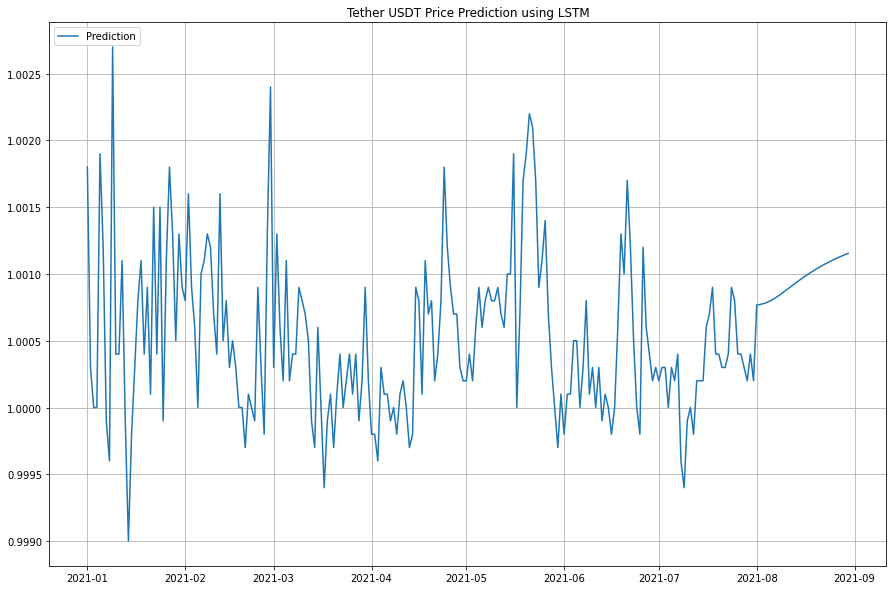

In [8]:
df.index = df.Date
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title('Tether USDT Price Prediction using LSTM')
plt.plot(df['pred'],label='Prediction')
plt.legend(loc=2)

# Ethereum LSTM Prediction

In [10]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

data = investpy.get_crypto_historical_data(crypto='ethereum',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')
df1=data.reset_index()['Close']

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

##splitting dataset into train and test split
training_size=int(len(df1)*0.5)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [11]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

model_lstm = tf.keras.models.load_model('model_lstm')
### Lets Do the prediction and check performance metrics
train_predict=model_lstm.predict(X_train)
test_predict=model_lstm.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

x_input=test_data[6:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [12]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

[0.4860203]
101
1 day input [0.43238064 0.46162168 0.52462296 0.56304491 0.58668784 0.58983441
 0.59431872 0.6443033  0.6459522  0.78526228 0.74377519 0.81242112
 0.80275456 0.80034083 0.92374064 0.92859137 0.93605649 1.
 0.89646839 0.86967016 0.97312907 0.84699563 0.82968366 0.74173079
 0.77019246 0.49628925 0.59570589 0.49553896 0.4543863  0.39905661
 0.55767944 0.57463372 0.62685465 0.58358779 0.4900659  0.44987001
 0.48186794 0.57561666 0.55386401 0.57492744 0.61774936 0.56922755
 0.5525001  0.57712597 0.54192912 0.51808844 0.54588415 0.50625825
 0.47179134 0.47674094 0.51739631 0.53868658 0.52773755 0.47639487
 0.47765699 0.43633567 0.41812508 0.44050299 0.33793978 0.3337172
 0.36039329 0.36642762 0.31449751 0.32032827 0.36373471 0.39374931
 0.41574043 0.4492215  0.40131621 0.41459755 0.43493105 0.46358174
 0.4266313  0.46343634 0.46164785 0.40454712 0.41201224 0.40190074
 0.41011033 0.37979038 0.35234655 0.36802708 0.34550959 0.33416505
 0.33991729 0.33830038 0.31667859 0.3073726

12 day input [0.81242112 0.80275456 0.80034083 0.92374064 0.92859137 0.93605649
 1.         0.89646839 0.86967016 0.97312907 0.84699563 0.82968366
 0.74173079 0.77019246 0.49628925 0.59570589 0.49553896 0.4543863
 0.39905661 0.55767944 0.57463372 0.62685465 0.58358779 0.4900659
 0.44987001 0.48186794 0.57561666 0.55386401 0.57492744 0.61774936
 0.56922755 0.5525001  0.57712597 0.54192912 0.51808844 0.54588415
 0.50625825 0.47179134 0.47674094 0.51739631 0.53868658 0.52773755
 0.47639487 0.47765699 0.43633567 0.41812508 0.44050299 0.33793978
 0.3337172  0.36039329 0.36642762 0.31449751 0.32032827 0.36373471
 0.39374931 0.41574043 0.4492215  0.40131621 0.41459755 0.43493105
 0.46358174 0.4266313  0.46343634 0.46164785 0.40454712 0.41201224
 0.40190074 0.41011033 0.37979038 0.35234655 0.36802708 0.34550959
 0.33416505 0.33991729 0.33830038 0.31667859 0.30737264 0.36798346
 0.37673396 0.40553297 0.41374547 0.42477884 0.43633567 0.45689309
 0.45657029 0.48036444 0.50363514 0.52435251 0.4860

23 day output [[0.5819834]]
24 day input [0.74173079 0.77019246 0.49628925 0.59570589 0.49553896 0.4543863
 0.39905661 0.55767944 0.57463372 0.62685465 0.58358779 0.4900659
 0.44987001 0.48186794 0.57561666 0.55386401 0.57492744 0.61774936
 0.56922755 0.5525001  0.57712597 0.54192912 0.51808844 0.54588415
 0.50625825 0.47179134 0.47674094 0.51739631 0.53868658 0.52773755
 0.47639487 0.47765699 0.43633567 0.41812508 0.44050299 0.33793978
 0.3337172  0.36039329 0.36642762 0.31449751 0.32032827 0.36373471
 0.39374931 0.41574043 0.4492215  0.40131621 0.41459755 0.43493105
 0.46358174 0.4266313  0.46343634 0.46164785 0.40454712 0.41201224
 0.40190074 0.41011033 0.37979038 0.35234655 0.36802708 0.34550959
 0.33416505 0.33991729 0.33830038 0.31667859 0.30737264 0.36798346
 0.37673396 0.40553297 0.41374547 0.42477884 0.43633567 0.45689309
 0.45657029 0.48036444 0.50363514 0.52435251 0.4860203  0.49127844
 0.49680936 0.50243551 0.50803328 0.51352054 0.51884562 0.52397895
 0.52890664 0.53362548 

In [13]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

df3=df1.tolist()
df3.extend(lst_output)

df3=scaler.inverse_transform(df3).tolist()
#plt.plot(df3)

In [14]:
output = []
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
  
# Driver code
#print ('The original list: ', df3)
reemovNestings(df3)

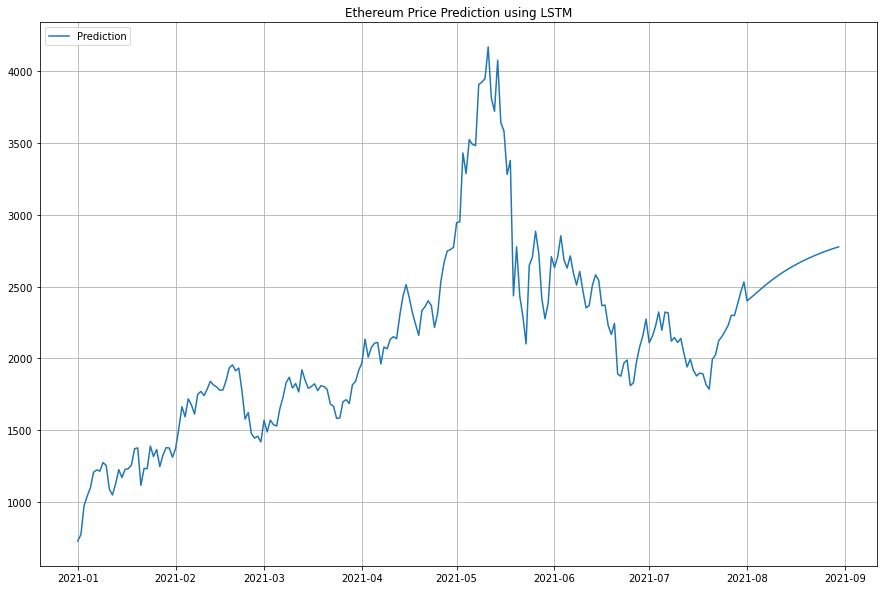

In [15]:
import pandas as pd
import numpy as np

np.random.seed(0)
# create an array of 5 dates starting at '2015-02-24', one per minute
rng = pd.date_range('2021-01-01', periods=242, freq='D')
df = pd.DataFrame({ 'Date': rng, 'pred' : output}) 

df.index = df.Date
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title('Ethereum Price Prediction using LSTM')
plt.plot(df['pred'],label='Prediction')
plt.legend(loc=2)

# DogeCoin LSTM Prediction

In [16]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

data = investpy.get_crypto_historical_data(crypto='dogecoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')
df1=data.reset_index()['Close']

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

##splitting dataset into train and test split
training_size=int(len(df1)*0.5)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [17]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

model_lstm = tf.keras.models.load_model('model_lstm')
### Lets Do the prediction and check performance metrics
train_predict=model_lstm.predict(X_train)
test_predict=model_lstm.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

x_input=test_data[6:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [18]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

[0.40691695]
101
1 day input [0.38806316 0.36029823 0.38775196 0.3890188  0.46669426 0.43683309
 0.4858555  0.56513544 0.53836285 0.63501312 0.81228504 0.95372266
 0.84286845 1.         0.92295282 0.82649045 0.65223665 0.71573165
 0.56295846 0.7064527  0.81313058 0.73660159 0.74478545 0.70565413
 0.6885495  0.4766338  0.57555647 0.51780705 0.49297363 0.44086116
 0.52666176 0.49883518 0.50618377 0.47911905 0.44782808 0.43520072
 0.43383699 0.46723594 0.53346281 0.61282642 0.57789198 0.54356822
 0.53642368 0.53378723 0.47562825 0.47026433 0.4945326  0.46864958
 0.45680024 0.44617517 0.46363211 0.47028929 0.45876877 0.43846986
 0.43578644 0.41923669 0.40451309 0.40129386 0.25499876 0.27111252
 0.33656284 0.37748066 0.34042503 0.3508578  0.37901321 0.3661451
 0.37623584 0.36331048 0.34918727 0.35070954 0.35400804 0.34551297
 0.33029907 0.33392786 0.31792272 0.29617641 0.3135717  0.3048858
 0.30681029 0.29558776 0.28433294 0.28129574 0.26260131 0.2432874
 0.2649471  0.2547815  0.24473774 0.

12 day output [[0.4704517]]
13 day input [0.84286845 1.         0.92295282 0.82649045 0.65223665 0.71573165
 0.56295846 0.7064527  0.81313058 0.73660159 0.74478545 0.70565413
 0.6885495  0.4766338  0.57555647 0.51780705 0.49297363 0.44086116
 0.52666176 0.49883518 0.50618377 0.47911905 0.44782808 0.43520072
 0.43383699 0.46723594 0.53346281 0.61282642 0.57789198 0.54356822
 0.53642368 0.53378723 0.47562825 0.47026433 0.4945326  0.46864958
 0.45680024 0.44617517 0.46363211 0.47028929 0.45876877 0.43846986
 0.43578644 0.41923669 0.40451309 0.40129386 0.25499876 0.27111252
 0.33656284 0.37748066 0.34042503 0.3508578  0.37901321 0.3661451
 0.37623584 0.36331048 0.34918727 0.35070954 0.35400804 0.34551297
 0.33029907 0.33392786 0.31792272 0.29617641 0.3135717  0.3048858
 0.30681029 0.29558776 0.28433294 0.28129574 0.26260131 0.2432874
 0.2649471  0.2547815  0.24473774 0.24121318 0.27089526 0.27180393
 0.27687278 0.27667167 0.28165979 0.29048368 0.29248891 0.29273552
 0.28833606 0.29694709 0

24 day input [0.70565413 0.6885495  0.4766338  0.57555647 0.51780705 0.49297363
 0.44086116 0.52666176 0.49883518 0.50618377 0.47911905 0.44782808
 0.43520072 0.43383699 0.46723594 0.53346281 0.61282642 0.57789198
 0.54356822 0.53642368 0.53378723 0.47562825 0.47026433 0.4945326
 0.46864958 0.45680024 0.44617517 0.46363211 0.47028929 0.45876877
 0.43846986 0.43578644 0.41923669 0.40451309 0.40129386 0.25499876
 0.27111252 0.33656284 0.37748066 0.34042503 0.3508578  0.37901321
 0.3661451  0.37623584 0.36331048 0.34918727 0.35070954 0.35400804
 0.34551297 0.33029907 0.33392786 0.31792272 0.29617641 0.3135717
 0.3048858  0.30681029 0.29558776 0.28433294 0.28129574 0.26260131
 0.2432874  0.2649471  0.2547815  0.24473774 0.24121318 0.27089526
 0.27180393 0.27687278 0.27667167 0.28165979 0.29048368 0.29248891
 0.29273552 0.28833606 0.29694709 0.29500939 0.40691695 0.40824074
 0.41067764 0.41421783 0.4187409  0.42407462 0.43003258 0.43643633
 0.44312674 0.44996983 0.45685726 0.46370542 0.4704

In [19]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

df3=df1.tolist()
df3.extend(lst_output)

df3=scaler.inverse_transform(df3).tolist()
#plt.plot(df3)

In [20]:
output = []
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
  
# Driver code
#print ('The original list: ', df3)
reemovNestings(df3)

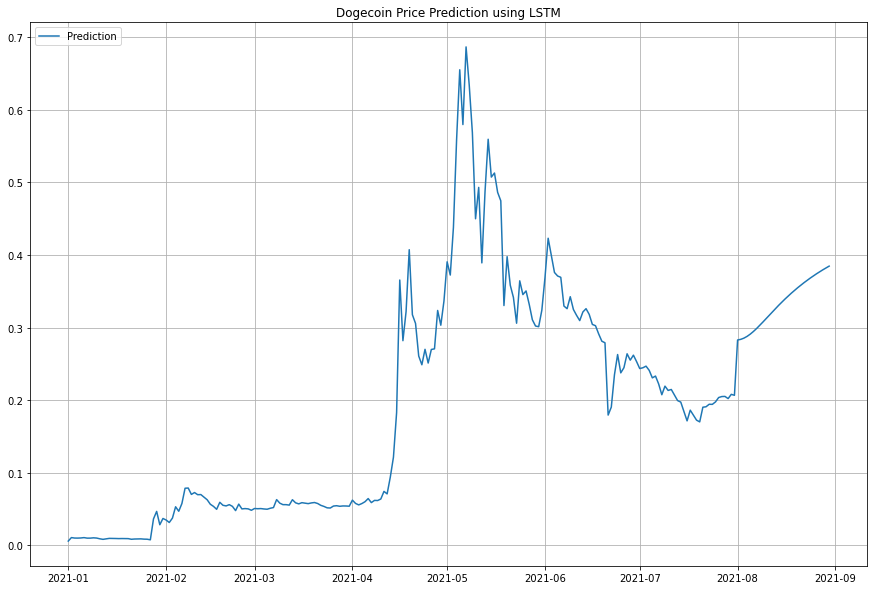

In [21]:
import pandas as pd
import numpy as np

np.random.seed(0)
# create an array of 5 dates starting at '2015-02-24', one per minute
rng = pd.date_range('2021-01-01', periods=242, freq='D')
df = pd.DataFrame({ 'Date': rng, 'pred' : output}) 

df.index = df.Date
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title('Dogecoin Price Prediction using LSTM')
plt.plot(df['pred'],label='Prediction')
plt.legend(loc=2)

# Bitcoin LSTM Prediction

In [22]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

data = investpy.get_crypto_historical_data(crypto='bitcoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')
df1=data.reset_index()['Close']

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

##splitting dataset into train and test split
training_size=int(len(df1)*0.5)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [23]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

model_lstm = tf.keras.models.load_model('model_lstm')
### Lets Do the prediction and check performance metrics
train_predict=model_lstm.predict(X_train)
test_predict=model_lstm.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

x_input=test_data[6:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [24]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

[0.30694166]
101
1 day input [0.60644803 0.57352623 0.72147099 0.75119511 0.74548726 0.708022
 0.82971241 0.83225184 0.79704807 0.81360697 0.71330856 0.82154998
 0.79124367 0.81850443 0.8624733  0.84486703 0.7749627  0.7997367
 0.58583131 0.59520494 0.59916035 0.50755976 0.49929786 0.41489131
 0.39605044 0.21534186 0.33226939 0.23221965 0.23663439 0.15563617
 0.2747345  0.26384249 0.28932155 0.26498347 0.18438899 0.15285392
 0.1841052  0.23225476 0.21437933 0.23977941 0.28751061 0.21916854
 0.18022001 0.18886223 0.12340482 0.11769697 0.23323776 0.21326175
 0.23272286 0.17868406 0.28270092 0.32677511 0.31585384 0.26260496
 0.25429625 0.18693134 0.18002692 0.18243761 0.06822796 0.0917615
 0.12622217 0.15522951 0.06536087 0.08435973 0.15560106 0.1496738
 0.18942687 0.16579386 0.12239841 0.13029168 0.15748223 0.17373102
 0.12661713 0.14235101 0.13188321 0.10258331 0.12982359 0.12143296
 0.14241245 0.10980077 0.09854012 0.10124923 0.07257248 0.05950967
 0.06315497 0.07096048 0.04321992 0.01

12 day output [[0.43030033]]
13 day input [0.79124367 0.81850443 0.8624733  0.84486703 0.7749627  0.7997367
 0.58583131 0.59520494 0.59916035 0.50755976 0.49929786 0.41489131
 0.39605044 0.21534186 0.33226939 0.23221965 0.23663439 0.15563617
 0.2747345  0.26384249 0.28932155 0.26498347 0.18438899 0.15285392
 0.1841052  0.23225476 0.21437933 0.23977941 0.28751061 0.21916854
 0.18022001 0.18886223 0.12340482 0.11769697 0.23323776 0.21326175
 0.23272286 0.17868406 0.28270092 0.32677511 0.31585384 0.26260496
 0.25429625 0.18693134 0.18002692 0.18243761 0.06822796 0.0917615
 0.12622217 0.15522951 0.06536087 0.08435973 0.15560106 0.1496738
 0.18942687 0.16579386 0.12239841 0.13029168 0.15748223 0.17373102
 0.12661713 0.14235101 0.13188321 0.10258331 0.12982359 0.12143296
 0.14241245 0.10980077 0.09854012 0.10124923 0.07257248 0.05950967
 0.06315497 0.07096048 0.04321992 0.01269419 0.08108306 0.08598344
 0.12414499 0.1306252  0.1764489  0.23161113 0.29525467 0.31138059
 0.31132793 0.37574969 

24 day output [[0.51039475]]
25 day input [0.39605044 0.21534186 0.33226939 0.23221965 0.23663439 0.15563617
 0.2747345  0.26384249 0.28932155 0.26498347 0.18438899 0.15285392
 0.1841052  0.23225476 0.21437933 0.23977941 0.28751061 0.21916854
 0.18022001 0.18886223 0.12340482 0.11769697 0.23323776 0.21326175
 0.23272286 0.17868406 0.28270092 0.32677511 0.31585384 0.26260496
 0.25429625 0.18693134 0.18002692 0.18243761 0.06822796 0.0917615
 0.12622217 0.15522951 0.06536087 0.08435973 0.15560106 0.1496738
 0.18942687 0.16579386 0.12239841 0.13029168 0.15748223 0.17373102
 0.12661713 0.14235101 0.13188321 0.10258331 0.12982359 0.12143296
 0.14241245 0.10980077 0.09854012 0.10124923 0.07257248 0.05950967
 0.06315497 0.07096048 0.04321992 0.01269419 0.08108306 0.08598344
 0.12414499 0.1306252  0.1764489  0.23161113 0.29525467 0.31138059
 0.31132793 0.37574969 0.35674205 0.30694166 0.31801772 0.32950231
 0.34105459 0.35245106 0.36355412 0.37428623 0.38461199 0.39452276
 0.4040274  0.41314346

In [25]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

df3=df1.tolist()
df3.extend(lst_output)

df3=scaler.inverse_transform(df3).tolist()
#plt.plot(df3)

In [26]:
output = []
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
  
# Driver code
#print ('The original list: ', df3)
reemovNestings(df3)

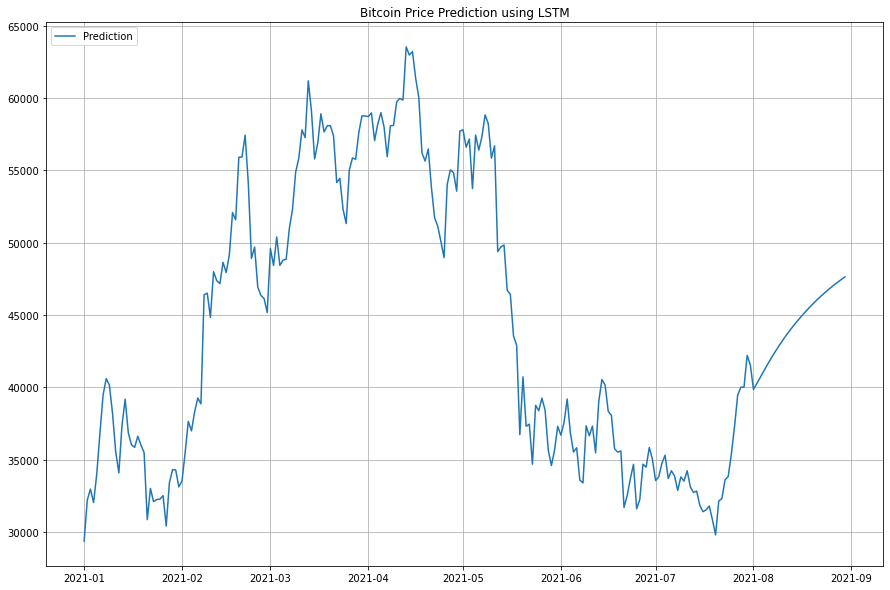

In [27]:
import pandas as pd
import numpy as np

np.random.seed(0)
# create an array of 5 dates starting at '2015-02-24', one per minute
rng = pd.date_range('2021-01-01', periods=242, freq='D')
df = pd.DataFrame({ 'Date': rng, 'pred' : output}) 

df.index = df.Date
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title('Bitcoin Price Prediction using LSTM')
plt.plot(df['pred'],label='Prediction')
plt.legend(loc=2)